# Project 9

In [1]:
# 1,2,3,4 COMBINED
import numpy as np 
 
def rotation(theta_x, theta_y, theta_z): 
    # Rotation matrix around the x-axis 
    Rx = np.array([[1, 0, 0], 
                   [0, np.cos(theta_x), -np.sin(theta_x)], 
                   [0, np.sin(theta_x), np.cos(theta_x)]]) 
     
    # Rotation matrix around the y-axis 
    Ry = np.array([[np.cos(theta_y), 0, -np.sin(theta_y)], 
                   [0, 1, 0], 
                   [np.sin(theta_y), 0, np.cos(theta_y)]]) 
     
    # Rotation matrix around the z-axis 
    Rz = np.array([[np.cos(theta_z), -np.sin(theta_z), 0], 
                   [np.sin(theta_z), np.cos(theta_z), 0], 
                   [0, 0, 1]])  
     
    # Combined rotation matrix 
    rotmat = Rz @ Ry @ Rx 
    return rotmat

In [2]:
# 5
import numpy as np 
import matplotlib.pyplot as plt 
 
# Define cube vertices 
Vertices = np.array([[1, 1, 1], 
                     [-1, 1, 1], 
                     [1, -1, 1], 
                     [1, 1, -1], 
                     [-1, -1, 1], 
                     [-1, 1, -1], 
                     [1, -1, -1], 
                     [-1, -1, -1]]) 
 
# Define adjacency matrix (Edges) 
Edges = np.zeros((8, 8)) 
Edges[0, 1] = 1 
Edges[0, 2] = 1 
Edges[0, 3] = 1 
Edges[1, 4] = 1 
Edges[1, 5] = 1 
Edges[2, 4] = 1 
Edges[2, 6] = 1 
Edges[3, 5] = 1 
Edges[3, 6] = 1 
Edges[4, 7] = 1 
Edges[5, 7] = 1 
Edges[6, 7] = 1 
Edges = Edges + Edges.T 

In [3]:
# 6
theta_x = np.pi / 3  # 60 degrees 
theta_y = np.pi / 4  # 45 degrees 
theta_z = np.pi / 6  # 30 degrees 
 
# Generate the rotation matrix 
rotmat = rotation(theta_x, theta_y, theta_z)

In [4]:
# 7
VertRot = Vertices @ rotmat.T

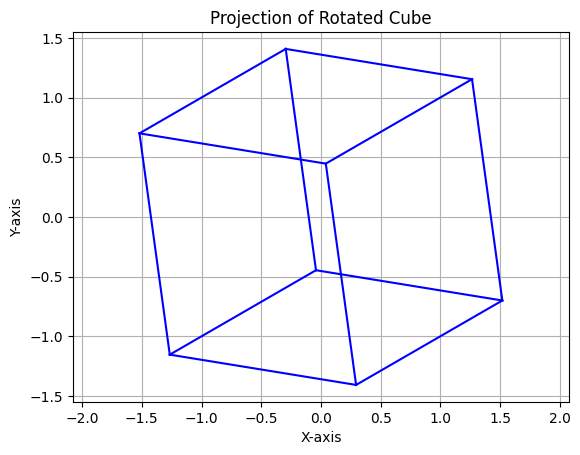

In [5]:
# 8
plt.figure() 
plt.axis('equal') 
plt.title('Projection of Rotated Cube') 
 
# Draw the projection of the cube 
for j in range(8): 
    for k in range(j + 1, 8):  # Start with j + 1 to avoid repeating lines 
        if Edges[j, k] == 1: 
            # Draw lines connecting the vertices (projecting by dropping the last coordinate) 
            plt.plot([VertRot[j, 0], VertRot[k, 0]], [VertRot[j, 1], VertRot[k, 1]], 'b-') 
 
plt.xlabel('X-axis') 
plt.ylabel('Y-axis') 
plt.grid() 
plt.show()

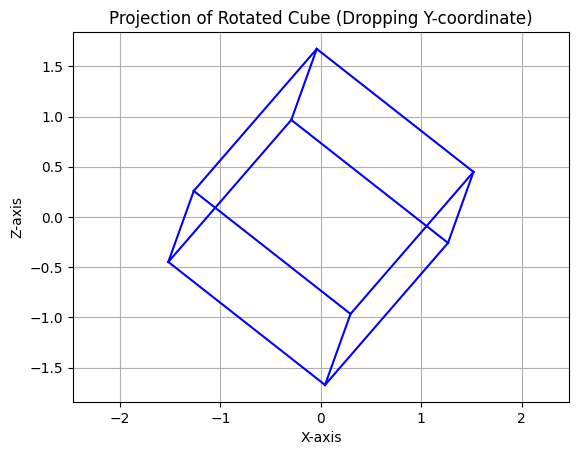

In [6]:
# 9
plt.figure() 
plt.axis('equal') 
plt.title('Projection of Rotated Cube (Dropping Y-coordinate)') 
# Draw the projection of the cube by dropping the Y-coordinate 
for j in range(8): 
    for k in range(j + 1, 8): 
        if Edges[j, k] == 1: 
            plt.plot([VertRot[j, 0], VertRot[k, 0]], [VertRot[j, 2], VertRot[k, 2]], 'b-')  
plt.xlabel('X-axis') 
plt.ylabel('Z-axis')  # Update label to reflect the projection 
plt.grid() 
plt.show()

Number of vertices in the array Vertices2: 60


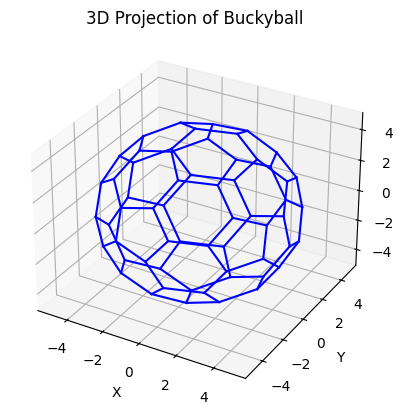

In [7]:
# 10,11,12
import math 
import itertools 
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
 
def distance(a, b): 
    '''Calculates the straight line distance between two points a and b.''' 
    return np.linalg.norm(np.array(a) - np.array(b)) 
 
def makecoords(): 
    '''Generate a list of coordinates for the buckyball.''' 
    phi = 0.5 * (1 + math.sqrt(5)) 
    c1 = (0, 1, 3 * phi) 
    c2 = (2, (1 + 2 * phi), phi) 
    c3 = (1, 2 + phi, 2 * phi) 
 
    combos1 = list(itertools.product((1, -1), repeat=2)) 
    for i in range(len(combos1)): 
        combos1[i] = (1,) + combos1[i] 
     
    combos23 = list(itertools.product((1, -1), repeat=3)) 
    coords = [] 
     
    for i in combos1: 
        coords.append(np.array(c1) * np.array(i)) 
    for i in combos23: 
 
        coords.append(np.array(c2) * np.array(i)) 
        coords.append(np.array(c3) * np.array(i)) 
     
    # Permutation matrices 
    P1 = np.array([[0, 0, 1], [1, 0, 0], [0, 1, 0]]) 
    P2 = np.array([[0, 1, 0], [0, 0, 1], [1, 0, 0]]) 
     
    for i in coords[:]: 
        coords.append(P1 @ i) 
        coords.append(P2 @ i) 
 
    return coords 
 
def makeadjmat(coords): 
    '''Make a 60x60 adjacency matrix for the coordinates.''' 
    D = np.zeros((60, 60)) 
     
    for i in range(len(coords)): 
        for j in range(len(coords)): 
            if distance(coords[i], coords[j]) == 2.0: 
                D[i][j] = 1 
                 
    return D 
 
def rotation(theta_x, theta_y, theta_z): 
    '''Create a rotation matrix based on the specified angles.''' 
    rot_x = np.array([[1, 0, 0], 
                      [0, np.cos(theta_x), -np.sin(theta_x)], 
                      [0, np.sin(theta_x), np.cos(theta_x)]]) 
     
    rot_y = np.array([[np.cos(theta_y), 0, np.sin(theta_y)], 
                      [0, 1, 0], 
                      [-np.sin(theta_y), 0, np.cos(theta_y)]]) 
     
    rot_z = np.array([[np.cos(theta_z), -np.sin(theta_z), 0], 
                      [np.sin(theta_z), np.cos(theta_z), 0], 
                      [0, 0, 1]]) 
     
    return rot_z @ rot_y @ rot_x  # Combined rotation matrix 
 
def plot_buckyball(coords, edges, rotmat): 
    '''Plot the 3D projection of the buckyball.''' 
 
    fig = plt.figure() 
    ax = fig.add_subplot(111, projection='3d') 
    ax.set_title('3D Projection of Buckyball') 
 
    # Apply the rotation matrix to the coordinates 
    rotated_coords = [np.dot(rotmat, vertex) for vertex in coords] 
 
    num_vertices = len(coords) 
    for j in range(num_vertices): 
        for k in range(j + 1, num_vertices): 
            if edges[j, k] == 1: 
                ax.plot([rotated_coords[j][0], rotated_coords[k][0]],  
                         [rotated_coords[j][1], rotated_coords[k][1]],  
                         [rotated_coords[j][2], rotated_coords[k][2]], 'b-') 
 
    ax.set_xlabel('X') 
    ax.set_ylabel('Y') 
    ax.set_zlabel('Z') 
    plt.show() 
 
if __name__ == "__main__": 
    # Task 10: Generate coordinates for the buckyball 
    coords = makecoords() 
     
    # Generate the adjacency matrix 
    edges = makeadjmat(coords) 
 
    # Find and print the number of vertices 
    num_vertices = len(coords) 
    print("Number of vertices in the array Vertices2:", num_vertices) 
 
    # Define rotation angles (in radians) 
    theta_x = np.pi / 3 
    theta_y = np.pi / 4 
    theta_z = np.pi / 6 
 
    # Generate the rotation matrix 
    rotmat = rotation(theta_x, theta_y, theta_z) 
 
    # Task 11: Plot the 3D projection of the buckyball 
    plot_buckyball(coords, edges, rotmat)

In [8]:
# 13
import numpy as np 
from scipy.io import loadmat 
data_v = loadmat(r"v.mat") 
data_f = loadmat(r"f.mat") 
# Extract the vertices (v) and faces (f) from the loaded data 
v = data_v['v']  # Ensure the key matches the variable name in the .mat file 
f = data_f['f']  # Ensure the key matches the variable name in the .mat file 
# Variables: v, f 
print("Vertices (v):") 
print(v) 
print("\nFaces (f):") 
print(f)

Vertices (v):
[[ 58.64743805 111.18914032   6.92400026]
 [ 60.88143921 106.30313873  14.13500023]
 [ 67.99643707 114.31414032   8.17200089]
 ...
 [ 87.3354187   43.88992691   1.28999996]
 [ 97.1484375   53.10213852   1.47399998]
 [ 88.33444214  45.02913666   3.69500017]]

Faces (f):
[[   1    2    3]
 [   4    5    6]
 [   7    8    9]
 ...
 [1312 1313 1314]
 [1315 1316 1317]
 [1318 1319 1320]]


In [9]:
# 14
mFaces, nFaces = f.shape  # Get the number of rows and columns in f 
 
# Output the dimensions of f 
print("Dimensions of the face matrix f,") 
print("Number of faces (mFaces):", mFaces) 
print("Number of vertices per face (nFaces):", nFaces)

Dimensions of the face matrix f,
Number of faces (mFaces): 440
Number of vertices per face (nFaces): 3


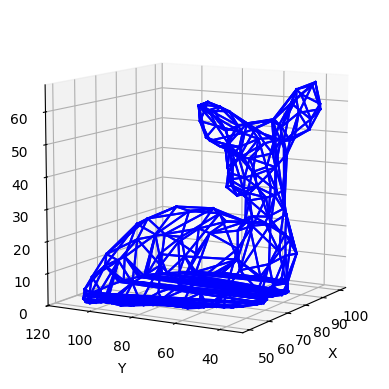

In [10]:
# 15
mFaces = f.shape[0] 
 
# Generate the 3D model 
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
ax.set_box_aspect([1, 1, 1])  # Set aspect ratio to equal 
 
# Loop through each face and plot the edges 
for j in range(mFaces): 
    # Draw lines between the vertices of each face 
    ax.plot([v[f[j, 0] - 1, 0], v[f[j, 1] - 1, 0]], [v[f[j, 0] - 1, 1], v[f[j, 1] - 1, 1]],  
            [v[f[j, 0] - 1, 2], v[f[j, 1] - 1, 2]], color='b')  # Edge between vertex 1 and 2 
    ax.plot([v[f[j, 0] - 1, 0], v[f[j, 2] - 1, 0]], [v[f[j, 0] - 1, 1], v[f[j, 2] - 1, 1]],  
            [v[f[j, 0] - 1, 2], v[f[j, 2] - 1, 2]], color='b')  # Edge between vertex 1 and 3 
    ax.plot([v[f[j, 1] - 1, 0], v[f[j, 2] - 1, 0]], [v[f[j, 1] - 1, 1], v[f[j, 2] - 1, 1]],  
            [v[f[j, 1] - 1, 2], v[f[j, 2] - 1, 2]], color='b')  # Edge between vertex 2 and 3 
 
# Set labels for the axes 
ax.set_xlabel('X') 
ax.set_ylabel('Y') 
ax.set_zlabel('Z') 
 
# Set the viewpoint (azimuth, elevation) 
ax.view_init(elev=10, azim=210)  # You can change the angles here 
 
# Show the 3D plot 
plt.show()

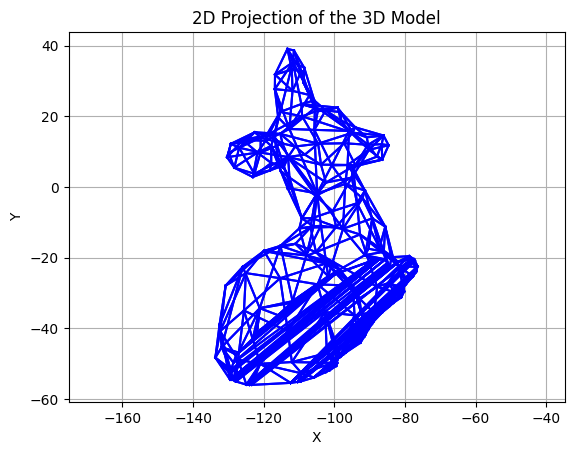

In [11]:
# 16
theta1 = np.pi / 3  # Rotation around x-axis 
theta2 = np.pi / 4  # Rotation around y-axis 
theta3 = np.pi   # Rotation around z-axis 
# Generate the rotation matrix 
rotmat = rotation(theta1, theta2, theta3) 
# Transform the coordinates of the vertices with the rotation matrix 
VertRot = v @ rotmat.T  # Apply rotation 
# Create a new figure window for the 2D projection 
plt.figure() 
plt.axis('equal') 
plt.title("2D Projection of the 3D Model") 
# Plot the 2D projection by connecting the edges defined in f 
for j in range(f.shape[0]): 
    plt.plot([VertRot[f[j, 0] - 1, 0], VertRot[f[j, 1] - 1, 0]],  
[VertRot[f[j, 0] - 1, 1], VertRot[f[j, 1] - 1, 1]], color='b') 
    plt.plot([VertRot[f[j, 0] - 1, 0], VertRot[f[j, 2] - 1, 0]],  
[VertRot[f[j, 0] - 1, 1], VertRot[f[j, 2] - 1, 1]], color='b') 
    plt.plot([VertRot[f[j, 1] - 1, 0], VertRot[f[j, 2] - 1, 0]],  
[VertRot[f[j, 1] - 1, 1], VertRot[f[j, 2] - 1, 1]], color='b') 
# Set labels for the axes 
plt.xlabel('X') 
plt.ylabel('Y') 
plt.grid() 
plt.show()

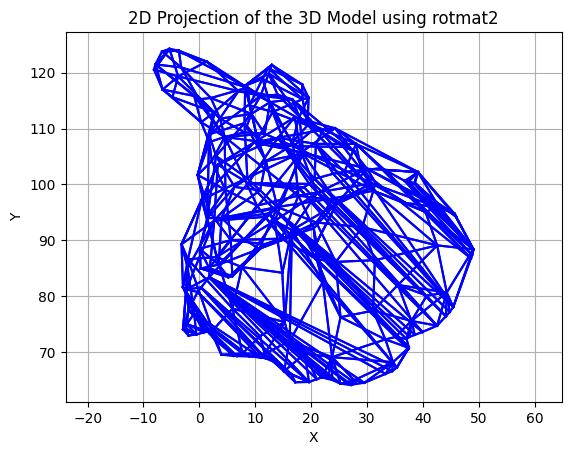

In [12]:
# 17
theta1 = -np.pi / 3  # Rotation around x-axis 
theta2 = 0           
# No rotation around y-axis 
theta3 = np.pi / 4   # Rotation around z-axis 
# Generate the rotation matrix 
88 
89 
rotmat2 = rotation(theta1, theta2, theta3) 
 
# Rotate the vertices 
vRot = v @ rotmat2.T  # Apply rotation 
 
# Project to the XY plane 
vPrj = vRot[:, :2]  # Keep only the first two coordinates 
 
# Create a new figure window for the 2D projection 
plt.figure() 
plt.axis('equal') 
plt.title("2D Projection of the 3D Model using rotmat2") 
 
# Plot the 2D projection by connecting the edges defined in f 
for j in range(f.shape[0]): 
    plt.plot([vPrj[f[j, 0] - 1, 0], vPrj[f[j, 1] - 1, 0]],  
             [vPrj[f[j, 0] - 1, 1], vPrj[f[j, 1] - 1, 1]], color='b') 
    plt.plot([vPrj[f[j, 0] - 1, 0], vPrj[f[j, 2] - 1, 0]],  
             [vPrj[f[j, 0] - 1, 1], vPrj[f[j, 2] - 1, 1]], color='b') 
    plt.plot([vPrj[f[j, 1] - 1, 0], vPrj[f[j, 2] - 1, 0]],  
             [vPrj[f[j, 1] - 1, 1], vPrj[f[j, 2] - 1, 1]], color='b') 
 
# Set labels for the axes 
plt.xlabel('X') 
plt.ylabel('Y') 
plt.grid() 
plt.show() 
